In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap

m = Basemap(
        projection='merc',
        llcrnrlon=-130,
        llcrnrlat=25,
        urcrnrlon=-60,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

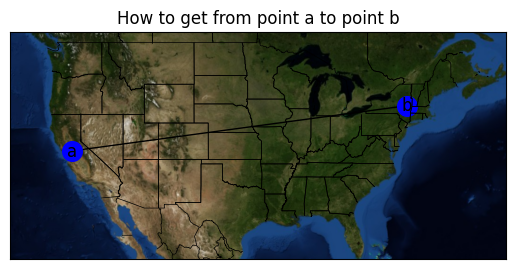

In [3]:

# position in decimal lat/lon
lats=[37.96,42.82]
lons=[-121.29,-73.95]
# convert lat and lon to map projection
mx,my=m(lons,lats)

# The NetworkX part
# put map projection coordinates in pos dictionary
G=nx.Graph()
G.add_edge('a','b')
pos={}
pos['a']=(mx[0],my[0])
pos['b']=(mx[1],my[1])
# draw
nx.draw_networkx(G,pos,node_size=200,node_color='blue')

# Now draw the map
m.drawcountries()
m.drawstates()
m.bluemarble()
plt.title('How to get from point a to point b')
plt.show()

In [ ]:

# Create Basemap instance
m = Basemap(
        projection='merc',
        llcrnrlon=1.9,  # Barcelona's longitude
        llcrnrlat=41.3, # Barcelona's latitude
        width=1E6,height=1E6,
         lon_0=1.19,lat_0=41.3,fix_aspect=False,
        resolution='i',
        suppress_ticks=True)

# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcounties()
# Show Barcelona marker
x, y = m(2.1734, 41.3851) # Barcelona's coordinates
m.plot(x, y, 'bo', markersize=8)
m.drawcountries(zorder=1,color="black", linewidth=1)
m.shadedrelief()
m.drawcoastlines(color="black",linewidth=1.2)
m.drawrivers(linewidth=0.5,color="blue")
m.drawmapboundary()
# Add title
plt.title('Barcelona, Spain')

# Show the plot
plt.show()


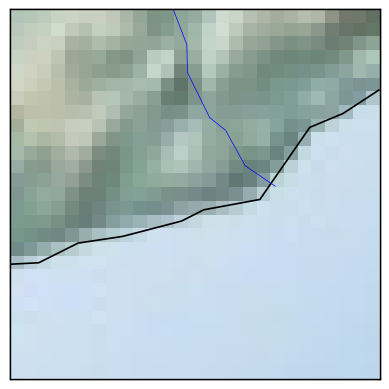

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map=Basemap(projection="lcc",resolution="i",width=1E5,height=1E5,
                             lon_0=1.9,lat_0=41.3,fix_aspect=False)
map.drawcountries(zorder=1,color="black", linewidth=1)
map.shadedrelief()
map.drawcoastlines(color="black",linewidth=1.2)
map.drawrivers(linewidth=0.5,color="blue")
map.drawmapboundary()

plt.show()

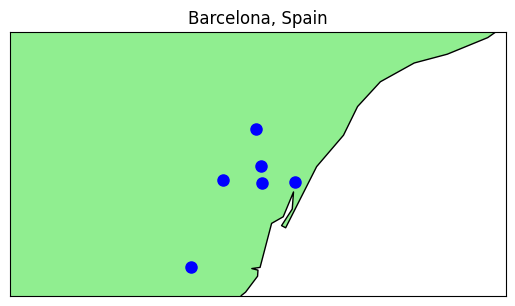

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Create Basemap instance
m = Basemap(
        projection='merc',
        llcrnrlon=1.9,  # Barcelona's longitude
        llcrnrlat=41.3, # Barcelona's latitude
        urcrnrlon=2.4,  # Barcelona's longitude
        urcrnrlat=41.5, # Barcelona's latitude
        lat_ts=0,
        resolution='h',
        suppress_ticks=True)

# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Fill continents with terrain color
m.fillcontinents(color='lightgreen', lake_color='aqua')

# Show Barcelona marker
x, y = m(2.1533988, 41.398724) # Barcelona's coordinates
m.plot(x, y, 'bo', markersize=8)
x, y = m(2.1480017, 41.42611) # Barcelona's coordinates
m.plot(x, y, 'bo', markersize=8)
x, y = m(2.1151996, 41.38749) # Barcelona's coordinates
m.plot(x, y, 'bo', markersize=8)
x, y = m(2.0821, 41.321774) # Barcelona's coordinates
m.plot(x, y, 'bo', markersize=8)
x, y = m(2.1873982, 41.386406) # Barcelona's coordinates
m.plot(x, y, 'bo', markersize=8)
x, y = m(2.1537998, 41.385315) # Barcelona's coordinates
m.plot(x, y, 'bo', markersize=8)

# Add title
plt.title('Barcelona, Spain')

# Show the plot
plt.show()
